In [50]:
import cv2
import os
import numpy as ny
from random import shuffle
from tqdm import tqdm
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [51]:
train_data = []
class_labels = ['Real','Fake']
IMAGE_SIZE = 64
folder ='Group_Project_Data/Train/'
for label in class_labels:
    path = os.path.join(folder, label)
    class_num = class_labels.index(label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        new_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
        train_data.append([new_array, class_num])
shuffle(train_data)

In [52]:
test_data = []
class_labels = ['Real','Fake']
IMAGE_SIZE = 64
folder ='Group_Project_Data/Valid/'
for label in class_labels:
    path = os.path.join(folder, label)
    class_num = class_labels.index(label)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        new_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
        test_data.append([new_array, class_num])
shuffle(test_data)

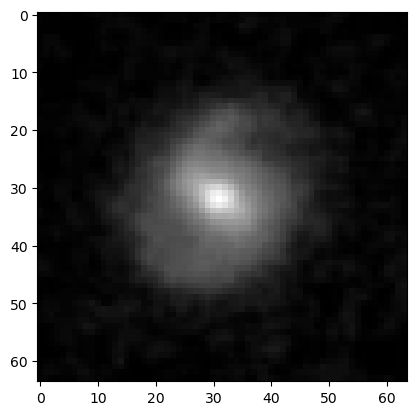

In [53]:
X_train =[]
y_train =[]
for features, label in train_data:
    X_train.append(features)
    y_train.append(label)
X_train = ny.array(X_train).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
X_train = X_train.astype('float32')
X_train /= 255
y_train=np_utils.to_categorical(y_train,2)
plt.imshow(X_train[10],cmap='gray')

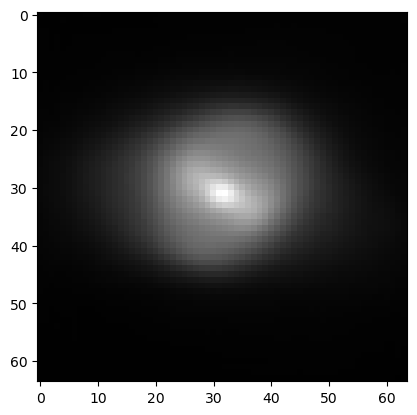

In [54]:
X_test =[]
y_test =[]
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
X_test = ny.array(X_test).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
X_test = X_test.astype('float32')
X_test /= 255
y_test=np_utils.to_categorical(y_test,2)
plt.imshow(X_test[10],cmap='gray')

In [80]:
batch_size = 16
classes =2
epochs = 30
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2,  activation=tf.nn.softmax)
])

In [81]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [82]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = cnn_model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/30
375/375 [==============================] - 14s 35ms/step - loss: 0.0891 - accuracy: 0.9832 - val_loss: 0.0602 - val_accuracy: 0.9865
Epoch 2/30
375/375 [==============================] - 13s 34ms/step - loss: 0.2155 - accuracy: 0.9802 - val_loss: 0.7934 - val_accuracy: 0.6960
Epoch 3/30
375/375 [==============================] - 13s 34ms/step - loss: 0.0139 - accuracy: 0.9970 - val_loss: 0.4336 - val_accuracy: 0.9615
Epoch 4/30
375/375 [==============================] - 13s 35ms/step - loss: 0.0122 - accuracy: 0.9972 - val_loss: 7.4841e-04 - val_accuracy: 0.9995
Epoch 5/30
375/375 [==============================] - 13s 34ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 2.6036e-04 - val_accuracy: 1.0000
Epoch 6/30
375/375 [==============================] - 13s 34ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0113 - val_accuracy: 0.9950
Epoch 7/30
375/375 [==============================] - 13s 35ms/step - loss: 8.5104e-04 - accuracy: 0.9995 - val_loss: 1.4930e-05

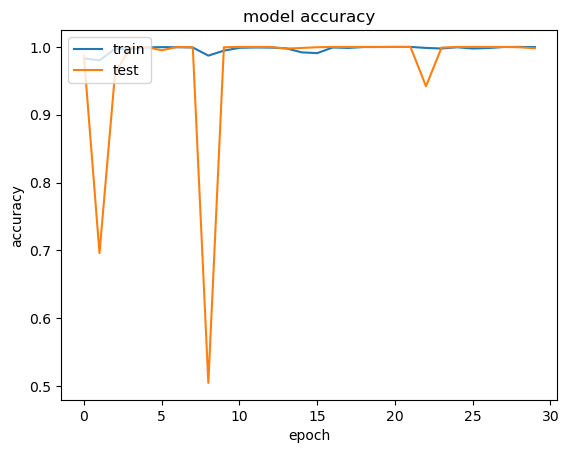

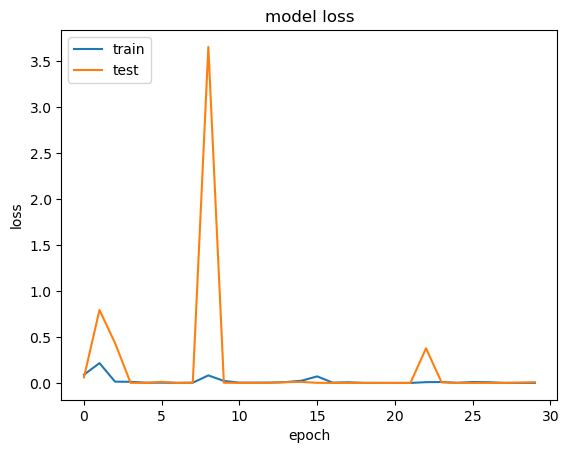

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
cnn_score = cnn_model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", cnn_score[0]*100)
print("Test accuracy: ", cnn_score[1]*100)

Test Score:  0.7567693013697863
Test accuracy:  99.80000257492065


In [85]:
cnn_model.save("CNNmodel.h5")

In [86]:
prediction = cnn_model.predict(X_test)

63/63 [==============================] - 1s 15ms/step


In [87]:
prediction = ny.argmax(prediction,axis=-1)
class_labels = ny.argmax(y_test,axis=-1)
class_labels

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [88]:
from sklearn.metrics import classification_report
print(classification_report(class_labels,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



<AxesSubplot:>

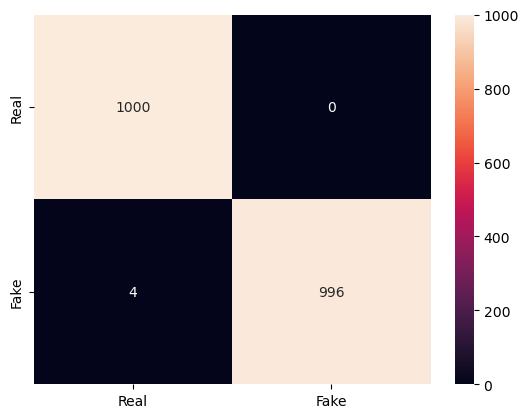

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
conf_matrix = confusion_matrix(class_labels,prediction)
sb.heatmap(conf_matrix,annot=True,fmt='g',xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])

1/1 [==============================] - 0s 8ms/step


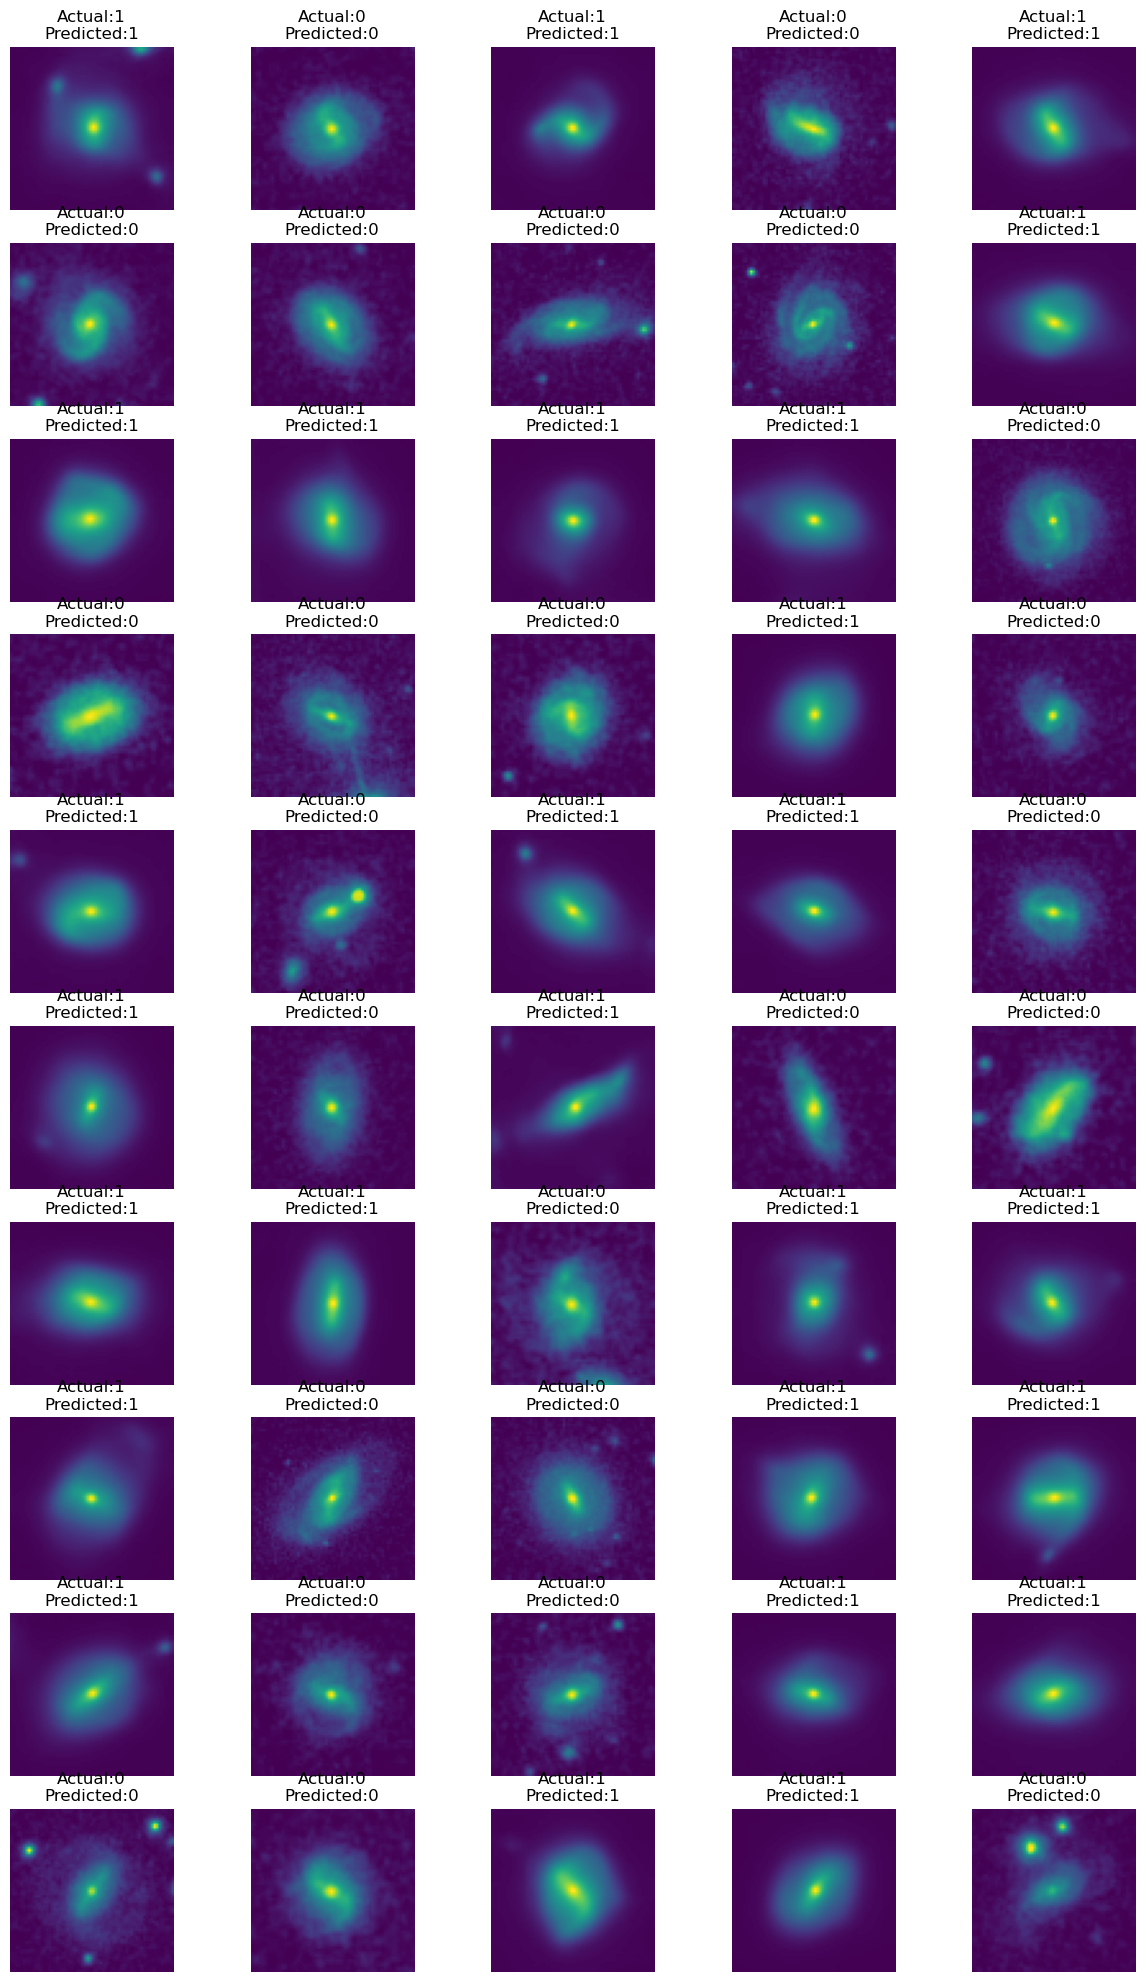

In [95]:
plt.figure(figsize=(15,25))
for i in range(1,51):
    plt.subplot(10,5,i)
    plt.imshow(X_test[i].reshape(64,64))
    predicted_label = cnn_model.predict(X_test[i].reshape(1,64,64,1),batch_size=1)
    plt.title('Actual:{:.0f}\nPredicted:{:.0f}'.format(y_test[i].argmax(),predicted_label.argmax()))
    plt.axis("off")
plt.show()